In [3]:
#importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reding file
customer_churn = pd.read_csv("/content/drive/MyDrive/Courses Material/Python for Data Science/Project/customer_churn.csv") 

In [13]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#finding the first few rows
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Extracting 5th column
customer_5=customer_churn.iloc[:,4] 
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [7]:
#Extracting 15th column
customer_15=customer_churn.iloc[:,14] 
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [8]:
#'Extracting male senior citizen with payment method-> electronic check'
senior_male_electronic=customer_churn[(customer_churn['gender']=='Male') & (customer_churn['SeniorCitizen']==1) & (customer_churn['PaymentMethod']=='Electronic check')]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [9]:
#tenure>70 or monthly charges>100
customer_total_tenure=customer_churn[(customer_churn['tenure']>70) | (customer_churn['MonthlyCharges']>100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [10]:
#cotract is 'two year', payment method is 'Mailed Check', Churn is 'Yes'
two_mail_yes=customer_total_tenure=customer_churn[(customer_churn['Contract']=='Two year') & (customer_churn['PaymentMethod']=='Mailed check') & (customer_churn['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [11]:
#Extracting 333 random records
customer_333=customer_churn.sample(n=333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5902,7054-ENNGU,Female,0,Yes,No,9,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,50.85,466.6,No
2536,0203-HHYIJ,Male,0,No,No,25,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),25.30,676.35,Yes
6319,8904-OPDCK,Male,1,Yes,No,54,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),24.95,1364.75,No
6233,6394-HHHZM,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.70,57.5,No
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No


In [12]:
len(customer_333)

333

In [14]:
#count of levels of churn column
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#-------------------------------Data Visualization------------------#

Text(0.5, 1.0, 'Distribution of Internet Service')

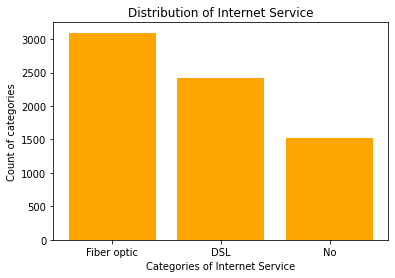

In [15]:
#bar-plot for 'InternetService' column
plt.bar(customer_churn['InternetService'].value_counts().keys().tolist(),customer_churn['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')

Text(0.5, 1.0, 'Distribution of tenure')

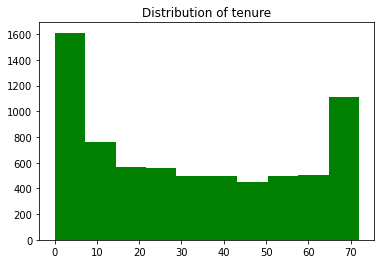

In [17]:
#histogram for 'tenure' column
plt.hist(customer_churn['tenure'],color='green',bins=10)
plt.title('Distribution of tenure')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

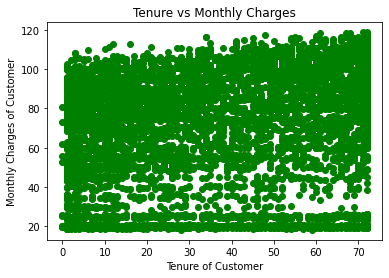

In [18]:
#scatterplot 
plt.scatter(x=customer_churn['tenure'],y=customer_churn['MonthlyCharges'],color='green')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


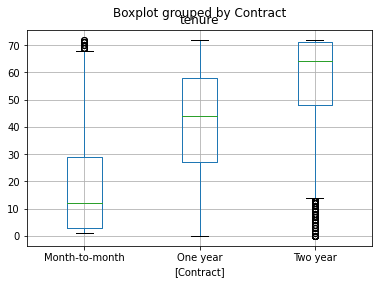

In [19]:
#Box-plot
customer_churn.boxplot(column='tenure',by=['Contract'])

In [ ]:
#-----------------------Linear Regresssion----------------------

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [21]:
x=pd.DataFrame(customer_churn['tenure'])
y=customer_churn['MonthlyCharges']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [23]:
#building the model
from sklearn.linear_model import LinearRegression
simpleLinearRegression = LinearRegression()
simpleLinearRegression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#predicting the values
y_pred = simpleLinearRegression.predict(x_test)
y_pred
z_pred = simpleLinearRegression.predict([[90]])
z_pred



array([81.7834579])

In [25]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
rmse

29.394584027273893

In [ ]:
#----------------------------------Logistic Regression-------------------------------

In [26]:
x=pd.DataFrame(customer_churn['MonthlyCharges'])
y=customer_churn['Churn']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65,random_state=5)

In [28]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = logmodel.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test),accuracy_score(y_pred,y_test)

(array([[1824,  642],
        [   0,    0]]), 0.7396593673965937)

In [ ]:
#--------------Multiple logistic regression-------------------

In [31]:
x=pd.DataFrame(customer_churn.loc[:,['MonthlyCharges','tenure']])
y=customer_churn['Churn']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=5)

In [33]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = logmodel.predict(x_test)
y_pred


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[928  95]
 [218 168]]
              precision    recall  f1-score   support

          No       0.81      0.91      0.86      1023
         Yes       0.64      0.44      0.52       386

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.76      0.78      0.76      1409



In [ ]:
#---------------decision tree---------------

In [36]:
x=pd.DataFrame(customer_churn['tenure'])
y=customer_churn['Churn']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)  

In [38]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
y_pred = classifier.predict(x_test)  
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))   
print(accuracy_score(y_test, y_pred))  

[[934  80]
 [287 108]]
0.7395315826827538


In [ ]:
#--------------random forest---------------------

In [41]:
x=customer_churn[['tenure','MonthlyCharges']]
y=customer_churn['Churn']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 


In [43]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100) #the number of trees you want to build before taking the maximum voting or averages of predictions.
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
y_pred=clf.predict(x_test)



In [45]:
from sklearn import metrics
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"%")

Accuracy: 74.52093683463448 %
